In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd
from datetime import datetime

In [10]:
T = 400
dt = 0.001
S = np.zeros(int(T / dt))
E = np.zeros(int(T / dt))
I = np.zeros(int(T / dt))
P = np.zeros(int(T / dt))
A = np.zeros(int(T / dt))
H = np.zeros(int(T / dt))
R = np.zeros(int(T / dt))
F = np.zeros(int(T / dt))

In [11]:
beta, l, beta1, k, p1, p2, gama_a, gama_i, gama_r, sigma_i, sigma_p, sigma_h = 2.55, 1.56, 7.65, 0.25, 0.58, 0.001, 0.94, 0.27, 0.5, 3.5, 1, 0.3

$$
\left\{\begin{array}{l}
\frac{d S}{d t}=-\beta \frac{I}{N} S-l \beta \frac{H}{N} S-\beta^{\prime} \frac{P}{N} S, \\
\frac{d E}{d t}=\beta \frac{I}{N} S+l \beta \frac{H}{N} S+\beta^{\prime} \frac{P}{N} S-\kappa E, \\
\frac{d I}{d t}=\kappa \rho_1 E-\left(\gamma_a+\gamma_i\right) I-\delta_i I, \\
\frac{d P}{d t}=\kappa \rho_2 E-\left(\gamma_a+\gamma_i\right) P-\delta_p P, \\
\frac{d A}{d t}=\kappa\left(1-\rho_1-\rho_2\right) E, \\
\frac{d H}{d t}=\gamma_a(I+P)-\gamma_r H-\delta_h H, \\
\frac{d R}{d t}=\gamma_i(I+P)+\gamma_r H, \\
\frac{d F}{d t}=\delta_i I+\delta_p P+\delta_h H,
\end{array}\right.
$$

In [12]:
N = int(11000000 / 250)
S[0] = N - 6
I[0] = 1
P[0] = 5
for t in range(1, int(T / dt)):
    S[t] = (-beta * S[t - 1] * I[t - 1] - l * beta * H[t - 1] * S[t - 1] - beta1 * P[t - 1] * S[t - 1] ) / N
    E[t] = -S[t] - k * E[t - 1]
    I[t] = k * p1 * E[t - 1] - (gama_a + gama_i) * I[t - 1] - sigma_i * I[t - 1]
    P[t] = k * p2 * E[t - 1] - (gama_a + gama_i) * P[t - 1] - sigma_p * P[t - 1]
    A[t] = k * (1 - p1 - p2) * E[t - 1]
    H[t] = gama_a * (I[t - 1] + P[t - 1]) - gama_r * H[t - 1] - sigma_h * H[t - 1]
    R[t] = gama_i * (I[t - 1] + P[t - 1]) + gama_r * H[t - 1]
    F[t] = sigma_i * I[t - 1] + sigma_p * P[t - 1] + sigma_h * H[t - 1]
    
    
    S[t] = S[t - 1] + S[t] * dt;
    E[t] = E[t - 1] + E[t] * dt;
    I[t] = I[t - 1] + I[t] * dt;
    P[t] = P[t - 1] + P[t] * dt;
    A[t] = A[t - 1] + A[t] * dt;
    H[t] = H[t - 1] + H[t] * dt;
    R[t] = R[t - 1] + R[t] * dt;
    F[t] = F[t - 1] + F[t] * dt;
    
    
    
    for chump in (S, E, I, P, A, H, R, F):
        chump[t] = chump[t - 1] + chump[t] * dt

In [13]:
r = I + P + H
for i in range(66):
    print(int(r[int(i / dt)]), end=" ")
    if i % 10 == 0:
        print("")

6 
16 44 119 324 880 2390 6487 17628 48052 132092 
371126 1099404 3627759 13846207 55809669 207170079 713530822 2346318753 7478058641 23302893676 
71391384793 215827909818 645551008302 1914013376378 5633475645511 16478134342924 47942501311162 138841707871970 400455927550895 1150881135893660 
3296998329566102 9418119753642328 26834290673220120 76278513015976288 216367466011621312 612546359675556992 1731063410263459328 4883997548742272000 13758805917466394624 38705911138561687552 
108744759091438649344 305149502695592165376 855313316463653683200 2394846162640657448960 6698822476206951104512 18720344171751810269184 52269394245281092993024 145821352771802900725760 406494556176595770408960 1132313354418325666398208 
3151909207407123473891328 8767818256278621282893824 24374436372471179982667776 67719884577301692208381952 188039397263427035639840768 521848058526103935666618368 1447480278451952870651592704 4012958473195613020384919552 11120121047332943651183525888 30800375853680699745268400128

In [6]:
LC = [6, 12, 19, 25, 31, 38, 44, 60, 80, 131, 131, 259, 467, 688, 776, 1776, 1460, 1739, 1984, 2101, 2590, 2827, 3233, 3892, 3697, 3151, 3387, 2653, 2984, 2473, 2022, 1820, 1998, 1506, 1278, 2051, 1772, 1891, 399, 894, 397, 650, 415, 518, 412, 439, 441, 435, 579, 206, 130, 120, 143, 146, 102, 46, 45, 20, 31, 26, 11 , 18, 27, 29, 39, 39]

In [7]:
def plotting_2(x, y):
    fig, ax = plt.subplots()
    ax.set_facecolor('#232323')
    ax.plot(x, color = 'red')
    ax.plot(y, color = 'yellow')
    ax.tick_params(labelcolor='tab:orange')
    plt.show()

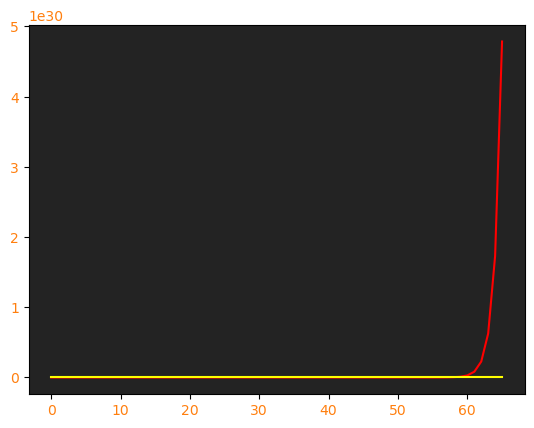

In [14]:
last = 66
plotting_2(I[:int(last / dt):int(1/dt)], LC[:last:])

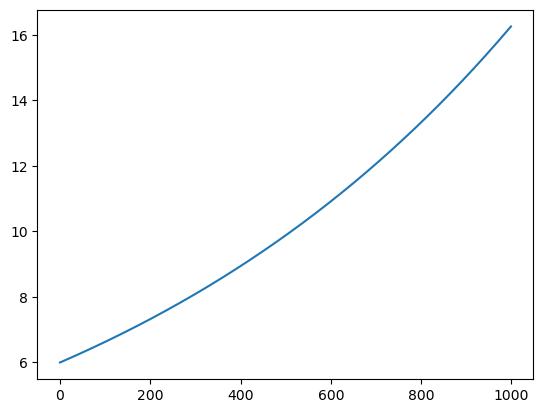

In [17]:
plt.plot(r[:int(1/dt)])

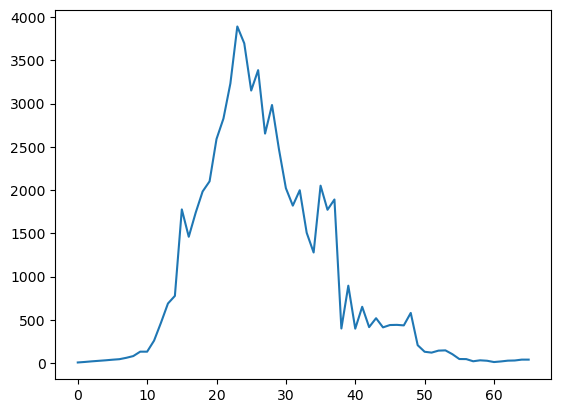

In [15]:
plt.plot(LC)

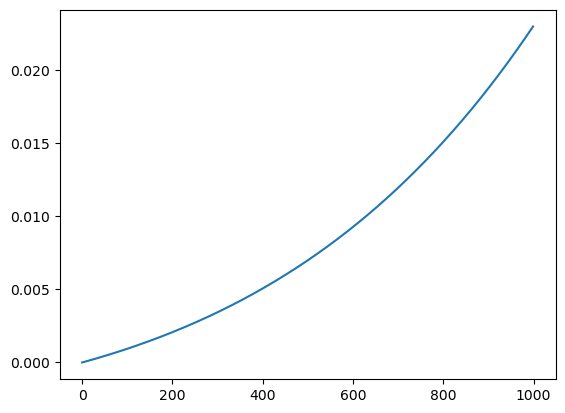

In [18]:
plt.plot(F[:int(1/dt)])

In [19]:
11000000 / 250

44000.0